# Аппроксимация данных. Радиоактивный распад


#### Условия задания:

Закон радиоактивного распада, открытый Э.Резерфрдом и Ф.Содди, утверждает, что активность радиоактивного вещества уменьшается во времени по экспоненциальному закону (геометрической прогресии). Таким образов, активность такого вещества можно характеризовать периодом полураспада – промежутком временем, в течении которого активность уменьшается в 2 раза. Здесь мы приводим данные, опубликованные в работе [Rutherford E. A Radioactive Substance emitted from Thorium Compounds // Philosophical Magazine. 1900. 49. 1–14]. Из сосуда с торием, был выкачан воздух. В результате была выделена эманация тория (газ радон-220, или торон). Для измерения ее ионизирующей способности подавалось напряжение 100 В и измерялась сила тока, которая менялась во времени.


In [46]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg
%matplotlib inline

Построим график по заданным данным

Для этого создадим два массива по 8 элементов хранящих данные о времени(x) и силе тока(y).
Отобразим их отношения на графике.

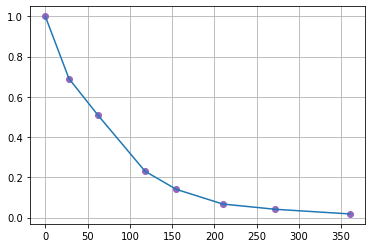

In [47]:
x = np.array([  0.000000000001, 28, 62, 118, 155, 210, 272, 360 ])
y = np.array([  1.00, 0.69, 0.51, 0.23, 0.14, 0.067, 0.041, 0.018 ])
plt.plot(x, y, 'o', color='tab:purple')
plt.plot(x, y)
plt.grid()
pass

Нам необходимо восстановить зависимость методом наименьших квадратов,представленную в виде показательной функции $y=ce^{\alpha t}$, где $t$ это время($x$)
Прологарифмируя по основанию $e$, получили новую функцию $\ln y = \alpha t + \ln c$.

Пусть $Y = \ln y$, а $\ln c = \beta$. Тогда полученная функция будет иметь вид $Y = \alpha t+\beta$. Таким образом мы свели показательную функцию к линейной, далее методом наименьших квадратов ищем необходимые коэффициенты $\alpha$ и $\beta$.

In [48]:
l = len(x)
X = np.stack((np.ones(l), x)).T
beta, residuals, rank, sv = linalg.lstsq(X, log_y)
beta0, beta1 = beta
beta0, beta1

(-0.07535205973302031, -0.011445651432512177)

$\beta=-0.07535205973302031$, $\alpha=-0.011445651432512177$

$\beta=\ln c$, значит необходимо найти $c=e^\beta$, а далее подставить $c$ и $\alpha$ в $y=ce^{\alpha t}$ и вычислить результат.

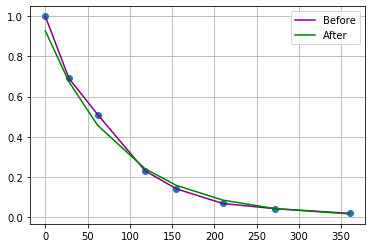

In [49]:
res = np.exp(-0.07535205973302031)*np.exp(-0.011445651432512177*x)
plt.plot(x, y, 'o')
plt.plot(x, y, color = 'purple', label = 'Before')
plt.plot(x, res, color = 'green', label = 'After')
plt.legend()
plt.grid()
pass

In [50]:
sum((res-y)**2)

0.009153418966215104

Полученная погрешность практически незначительна.

Радо́н-220, историческое название торо́н (лат. Thoron, обозначается символом Tn), также известный как эманация тория (лат. Thorii Emanatio, обозначается символом ThEm) — радиоактивный нуклид химического элемента радона с атомным номером 86 и массовым числом 220. Имеет период полураспада 55,6(1) с
Формула периода полураспада $N_0/2=N_0e^{-\lambda T}$, где $T$ - время, за которое распадается половина первоначального количества ядер, совпадает с заданной зависимостью $y=ce^{\alpha t}$, тогда получается, что $\lambda=-\alpha$ значит $\lambda=0.011445651432512177$

Найдем $T$ по формуле $T=\ln2/\lambda$

In [51]:
T=np.log(2)/0.011445651432512177
T

60.55987155008164

С учетом явных и неявных погрешностей, мы получили результат: $60.56$c, схожий с данными из интернета $55,6(1)$c.